In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import random
import gzip
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns",0)
plt.style.use("ggplot")
pd.options.display.float_format = "{:.2f}".format


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [ ]:
print(df.shape)

(99999, 27)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [ ]:
df.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [ ]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,1004.97,0.29,1.02,0.33,18857.23,318.83,60.28,2114.61,1.44,227.23,53292.00,83.16,10.00,2.59,25.49,11.30,0.17
std,1.09,0.51,0.53,0.85,4944.92,21.51,47.71,607.47,1.33,351.47,49952.34,70.16,0.00,1.72,2.97,5.94,0.38
min,1001.00,0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,1.00,10.00,0.00,21.00,0.00,0.00
25%,1005.00,0.00,1.00,0.00,16920.00,320.00,50.00,1863.00,0.00,35.00,-1.00,23.00,10.00,1.00,23.00,7.00,0.00
50%,1005.00,0.00,1.00,0.00,20346.00,320.00,50.00,2323.00,2.00,39.00,100050.00,61.00,10.00,2.00,26.00,11.00,0.00
75%,1005.00,1.00,1.00,0.00,21893.00,320.00,50.00,2526.00,3.00,171.00,100093.00,101.00,10.00,4.00,28.00,16.00,0.00
max,1012.00,7.00,5.00,5.00,24043.00,1024.00,1024.00,2757.00,3.00,1839.00,100248.00,255.00,10.00,6.00,30.00,23.00,1.00


False   0.83
True    0.17
Name: click, dtype: float64




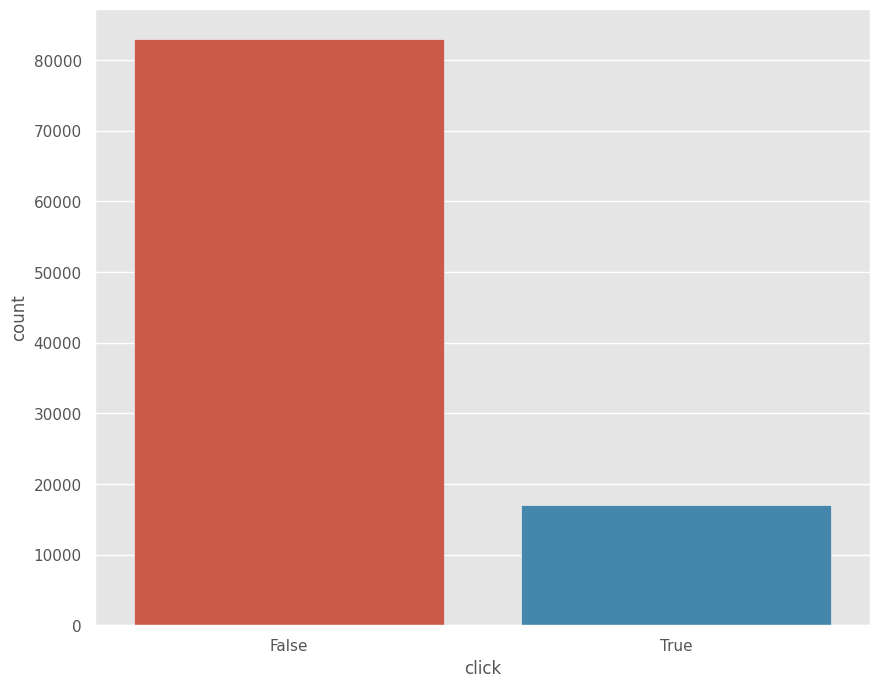

In [ ]:
# y is the target variable, analysing the same.
print(df.click.value_counts(normalize=True))
print("\n")
plt.figure()
sns.countplot(x='click', data=df)
plt.show()

83% values are 0 and 17% values are 1. data is highly imbalance. 

In [ ]:
df['click'].replace({False: 0, True: 1}, inplace=True)

In [ ]:
# segrigating numerical and categorical variables.

numerical = []
categorical = []

for col in (df.columns):
    if df[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


## Analysing categorical variables.

In [ ]:
for col in categorical:
  print("unique counts of "+col, len(df[col].unique()))
  print("----------------------")
  print(df[col].value_counts(normalize = True))
  print("\n")

unique counts of site_id 1485
----------------------
85f751fd   0.36
1fbe01fe   0.16
e151e245   0.07
d9750ee7   0.02
5b08c53b   0.02
           ... 
9e1b18be   0.00
27e10723   0.00
1661bb7f   0.00
1edf0277   0.00
bf991633   0.00
Name: site_id, Length: 1485, dtype: float64


unique counts of site_domain 1331
----------------------
c4e18dd6   0.37
f3845767   0.16
7e091613   0.08
7687a86e   0.03
98572c79   0.02
           ... 
babf5d87   0.00
a63817ea   0.00
8d450543   0.00
66cf2855   0.00
bde22369   0.00
Name: site_domain, Length: 1331, dtype: float64


unique counts of site_category 19
----------------------
50e219e0   0.41
f028772b   0.31
28905ebd   0.18
3e814130   0.08
f66779e6   0.01
75fa27f6   0.00
335d28a8   0.00
76b2941d   0.00
c0dd3be3   0.00
72722551   0.00
dedf689d   0.00
70fb0e29   0.00
0569f928   0.00
8fd0aea4   0.00
a818d37a   0.00
42a36e14   0.00
e787de0e   0.00
9ccfa2ea   0.00
5378d028   0.00
Name: site_category, dtype: float64


unique counts of app_id 1354
--------------

### observations :
All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach.
we will go with label encoding and scaling approach is a better idea for this.

## Analysing Numerical variables

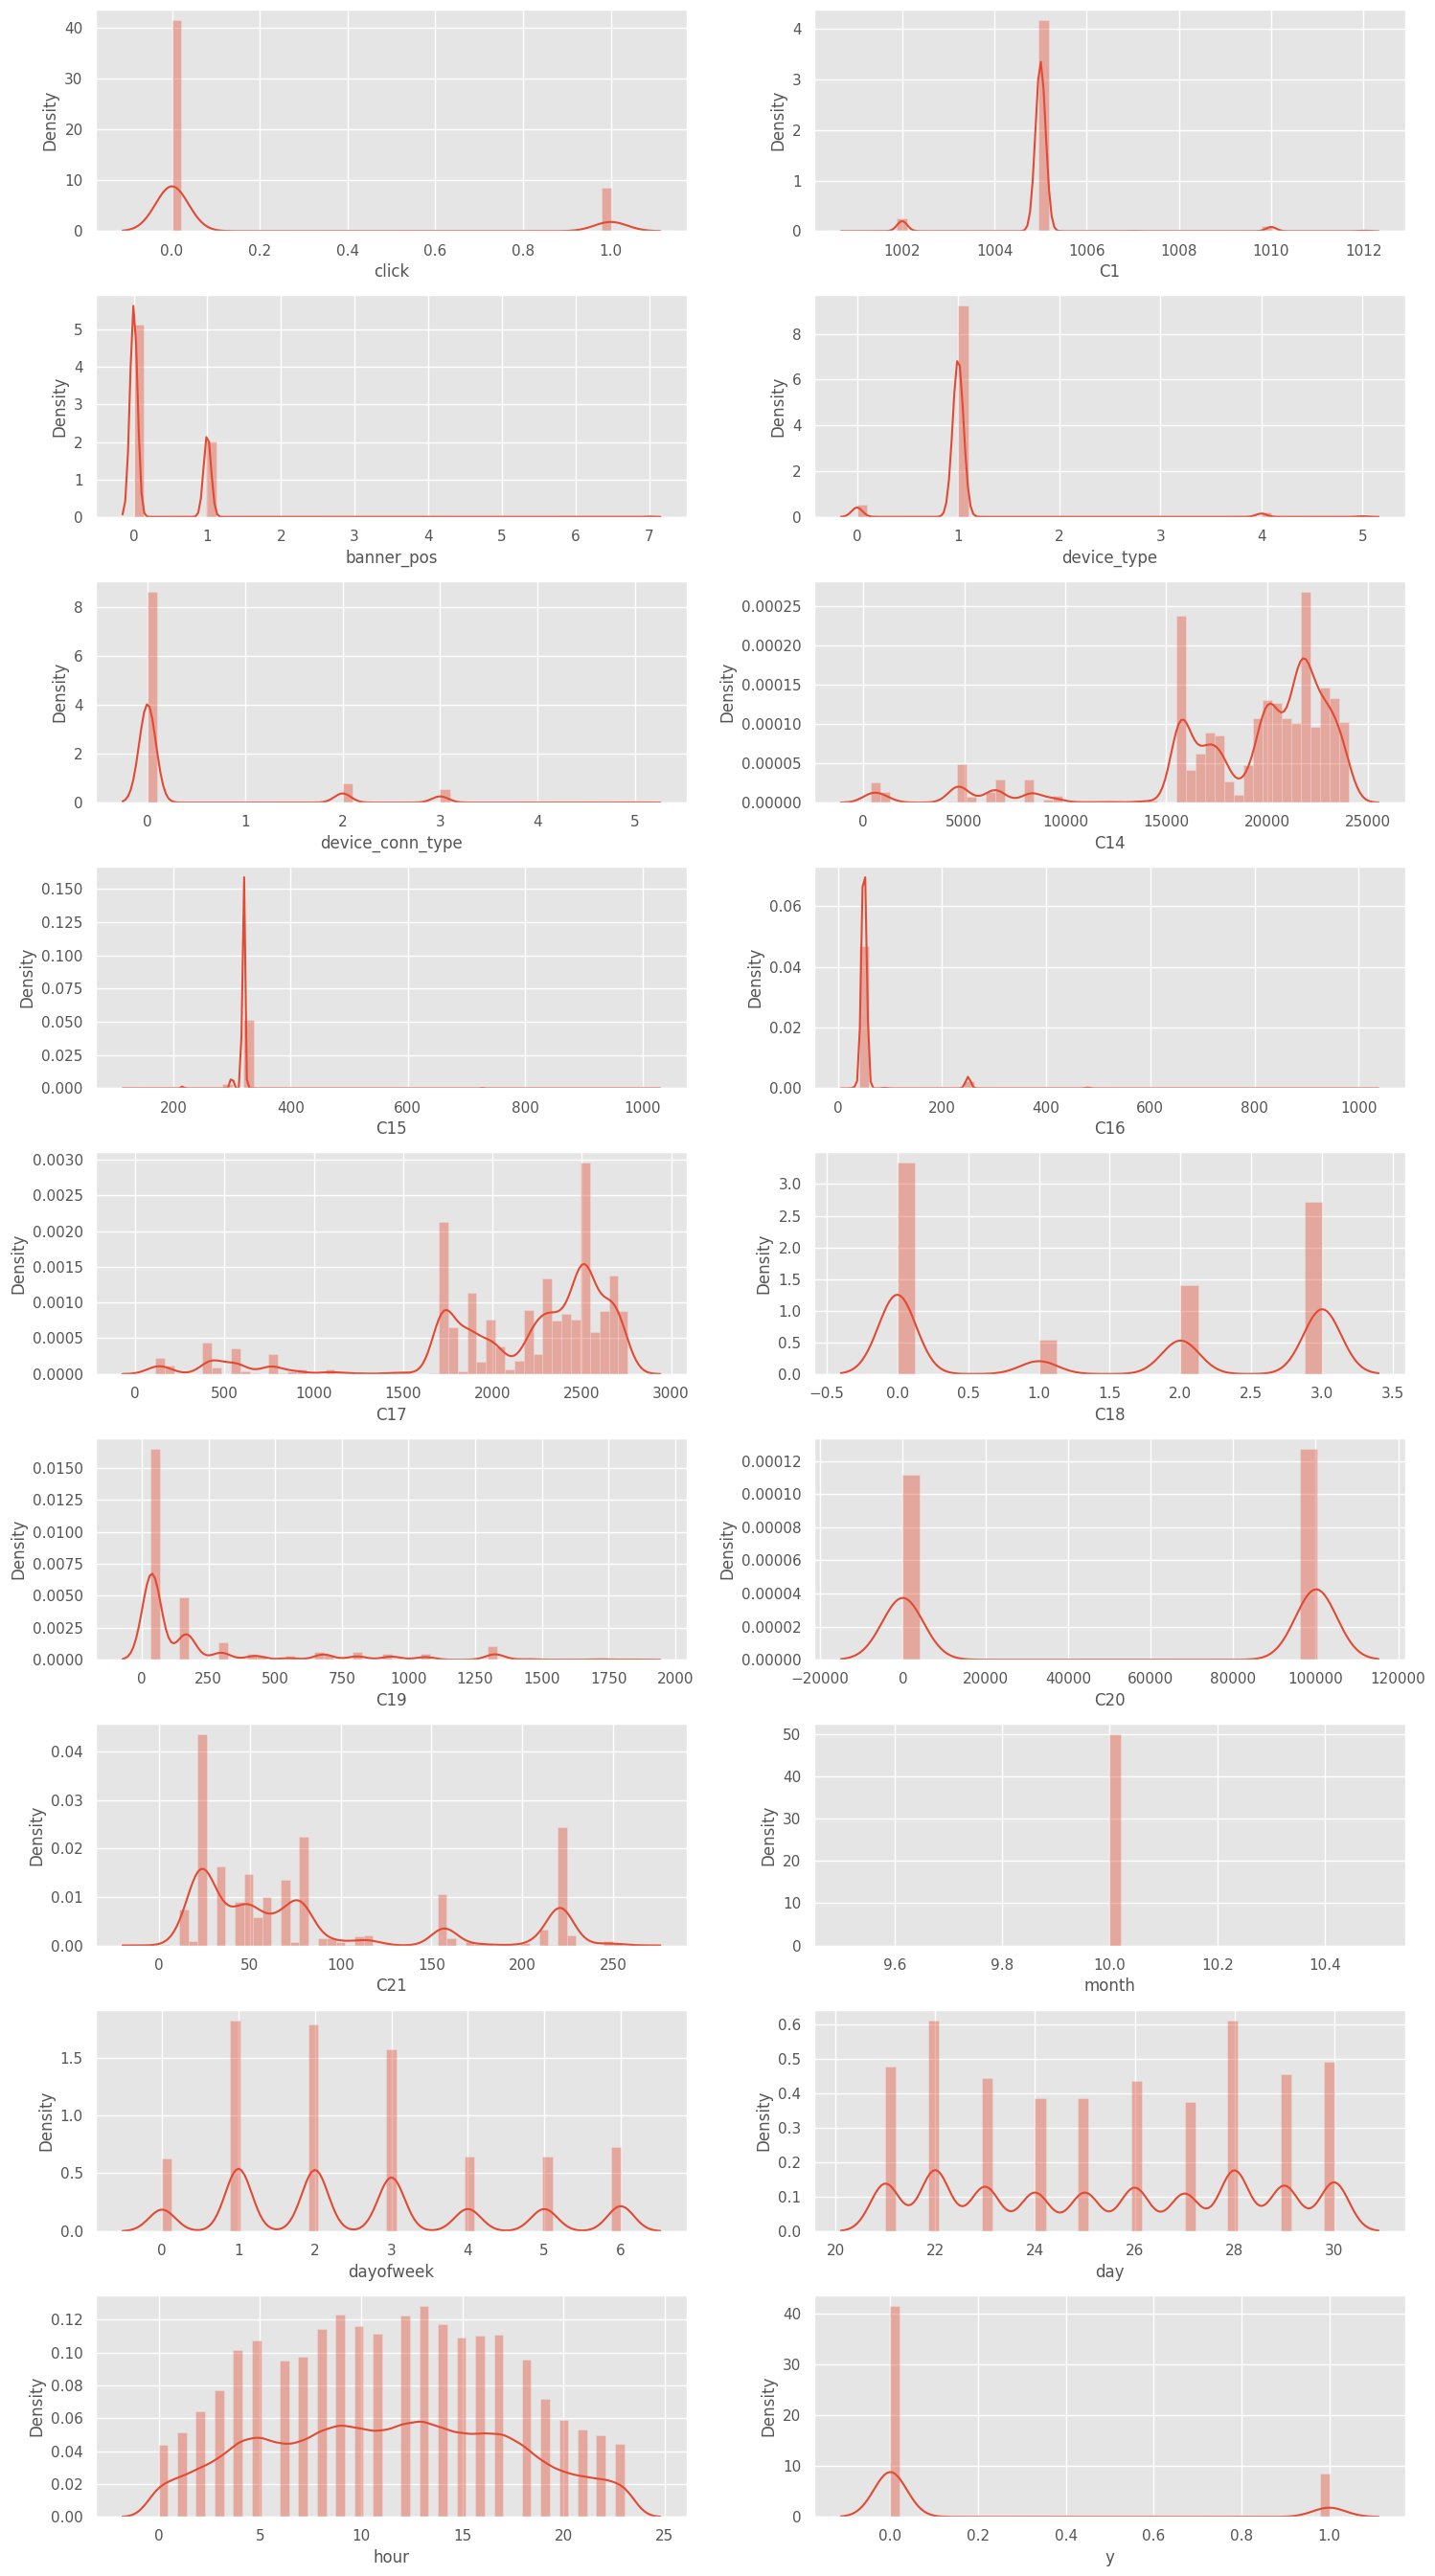

In [ ]:
# The code below will plot histograms for all numerical columns 

n = 2
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.distplot(df[numerical[i]])

plt.tight_layout()
plt.show()

### observations
* Y and Click looks like same columns, after co-relation we can drop on of them.
* month column has only 1 data entry, no exrtra information is added, can be dropped
* banner pos, device conn, C20, C15, C16 looks like data is cenetered around certain values.

Text(0.5, 1.05, 'Pearson correlation of Features')

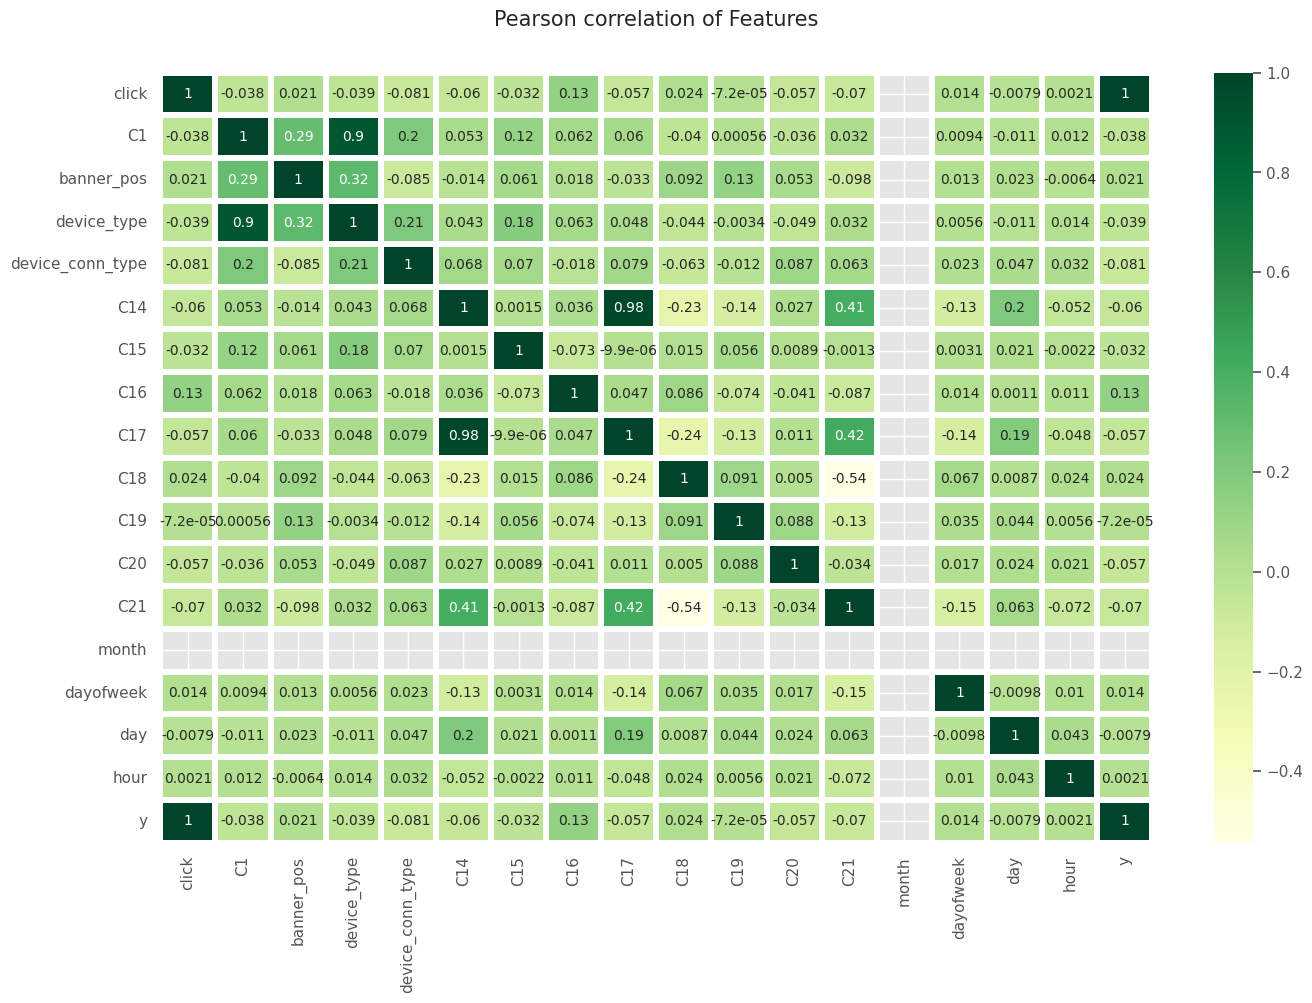

In [ ]:
#Pearson correlation table to find the relationship with output with all input features. 
corr = df.corr()
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### observation
* month has got no significance, better to drop it
* y and click are same drop click column
* C14 and C17 are highly co-related, later will remove one of them after the base model.
* device type with C1 are highly co-related, later will remove one of them after the base model.
* Removing C20 anomalised column, since it have got nearly 47% of values with -1. As a categorical variable it's not expected to have values as -1.

In [ ]:
#Dropping month column that has no significance, C20 which has nearly 47% with -1, click column

df.drop(['month', 'C20', 'y'], axis=1, inplace=True)
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

In [ ]:
X = df.drop(["click"],axis=1)
y = df['click']

0   0.83
1   0.17
Name: click, dtype: float64




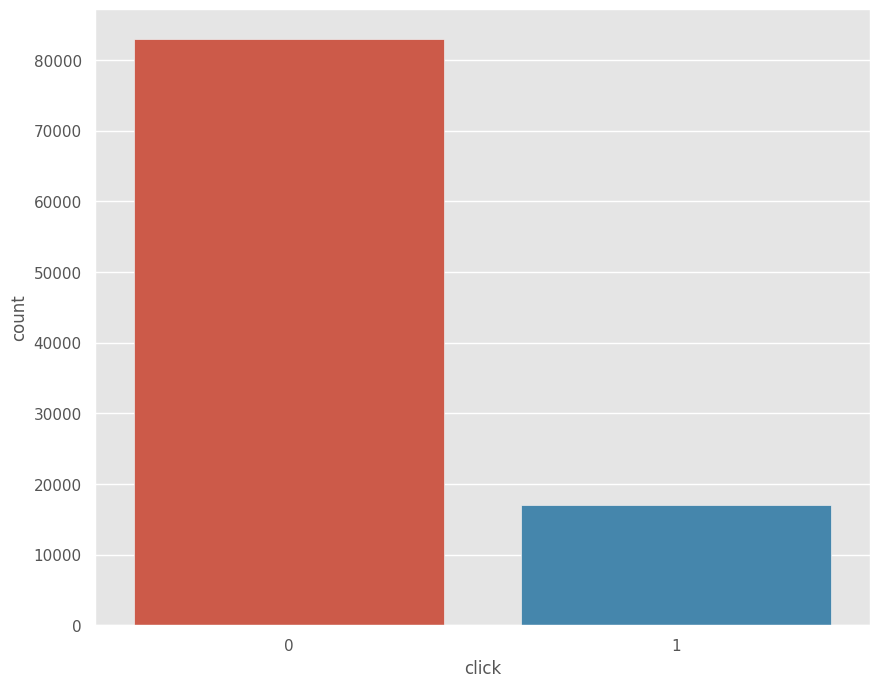

In [ ]:
print(df.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x=y)
plt.show()

In [ ]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(5)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1005,1,0.03,0.03,0.18,0.20,0.19,0.20,0.17,0.15,0.19,1,0,22683,320,50,2528,0,39,221,1,28,14
1,1005,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.19,0.28,1,0,17037,320,50,1934,2,39,16,2,22,19
2,1005,0,0.05,0.03,0.21,0.20,0.19,0.20,0.17,0.15,0.10,1,0,22155,320,50,2552,3,167,23,3,23,18
3,1002,0,0.14,0.14,0.13,0.20,0.19,0.20,0.15,0.15,0.19,0,0,21591,320,50,2478,3,167,23,2,22,19
4,1005,0,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.28,0.22,1,0,15708,320,50,1722,0,35,79,1,21,8


In [ ]:
#splitting train and test data for preprocessing and feature engineering to avoid data leakage
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [ ]:
# Dealing with outliers by capping
col = ['C15', 'C16', 'C19', 'C21']
for col in col:
    percentiles = X_train[col].quantile(0.98)
    if X_train[col].quantile(0.98) < 0.5 * X_train[col].max():
        X_train[col][X_train[col] >= percentiles] = percentiles

## Building basic models [no feature engineering]
* In this no feature engineering is done apart from removing definate columns y and month.
* We will run 3 models a. Logistic regression [for explainability and finding linear relationship] b. Decision tree classifier [for explainability and also for non-linear relation] c. Random forest classifier [for accuracy and improving the model]
* Target variable is highly imbalance, so model will be baised towards majority class. for every base model will try with both balance and imbalance data.

### User-defined function for model building and evaluation

In [ ]:
# this function helps in evaluation the given model and provide accuracy and confusion matrix. 
def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    return accuracy, cnf_matrix

In [ ]:
# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 
def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
# Returns the ctossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [ ]:
# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    
    crossvalidation = cross_val(model, xtrain, ytrain, folds)
    
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'Model': [name],
          'Accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'Accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

#### Dummy classifier for verification¶
* Dummy classifier helps in baseling the model performace w.r.t dominanat class.

In [ ]:
outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = outcome.append(temp)
outcome

0.8301975742510608
[[58113     0]
 [11886     0]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83


### Basic regression model with imbalance precidtor

In [ ]:
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.03,0.04,0.18,0.20,0.19,0.20,0.17,0.14,0.19,1,0,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.28,0.21,1,0,17654,300,250,1994,2,39,33,1,28,3


In [ ]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,0.36,0.14,0.05,0.06,0.29,0.34,0.36,0.71,0.14,0.31,0.29,0.20,0.00,0.78,1.00,0.13,0.67,1.00,0.00,0.05,1.00,0.56,0.22
16863,0.36,0.00,0.62,0.72,0.48,0.34,0.36,0.71,0.14,0.67,0.33,0.20,0.00,0.73,0.90,1.00,0.71,0.67,0.00,0.13,0.17,0.78,0.13


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head(5)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
94821,0.82,0.14,0.16,0.20,0.21,0.09,0.36,0.30,0.10,0.34,0.18,0.80,0.60,0.86,1.00,0.13,0.67,0.00,0.36,0.39,0.67,0.33,0.96
50031,0.36,0.00,0.16,0.20,0.21,0.10,0.11,0.30,0.14,0.34,0.02,0.20,0.00,0.92,1.00,0.13,0.92,1.00,0.50,0.24,0.50,0.22,0.96
43776,0.36,0.14,0.32,0.37,0.29,0.34,0.36,0.71,0.14,0.33,0.21,0.20,0.00,0.83,1.00,0.13,0.64,1.00,0.07,0.09,0.83,0.44,0.78
60357,0.36,0.14,0.34,0.39,0.29,0.34,0.36,0.71,0.14,0.67,0.21,0.20,0.00,0.67,1.00,0.13,0.64,1.00,0.07,0.09,0.67,0.33,0.43
91629,0.36,0.00,0.16,0.20,0.21,0.10,0.11,0.30,0.14,0.34,0.06,0.20,0.00,0.69,1.00,0.13,0.37,1.00,0.43,0.24,0.33,0.89,0.74


In [ ]:
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - imbalance predict", y_train, X_train, y_test, X_test, model, 5)
outcome = outcome.append(temp)
outcome

0.9516666666666667
[[24368   538]
 [  912  4182]]


,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95


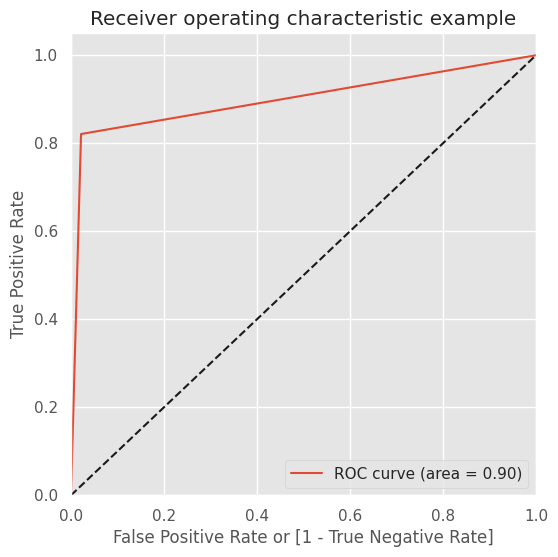

(array([0.        , 0.02160122, 1.        ]),
 array([0.        , 0.82096584, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(model, X_test, y_test)

#### Observation
* Logistic regression is giving accuracy nearly 9%.
* ROC_AUC is doing better

### Basic regression model with balance precidtor

Original dataset shape  Counter({0: 83019, 1: 16980})
Resampled dataset shape Counter({0: 83019, 1: 83019})


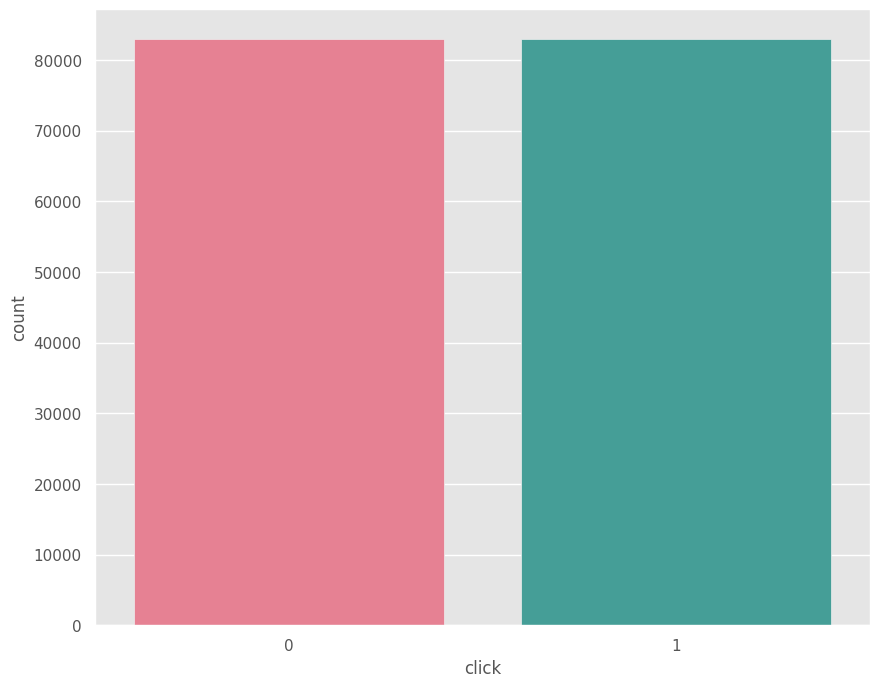

In [ ]:
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new, palette='husl')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

In [ ]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,0.36,0.14,0.16,0.21,0.29,0.34,0.36,0.71,0.14,0.67,0.13,0.20,0.00,0.82,0.22,0.03,0.80,0.00,0.36,0.19,0.17,0.00,0.48
12154,0.36,0.00,0.16,0.20,0.21,0.11,0.09,0.30,0.10,0.34,0.30,0.20,0.00,0.99,0.22,0.03,0.99,1.00,0.43,0.90,0.50,1.00,0.17


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

0.9343330924275275
[[23478  1428]
 [ 1843 23063]]


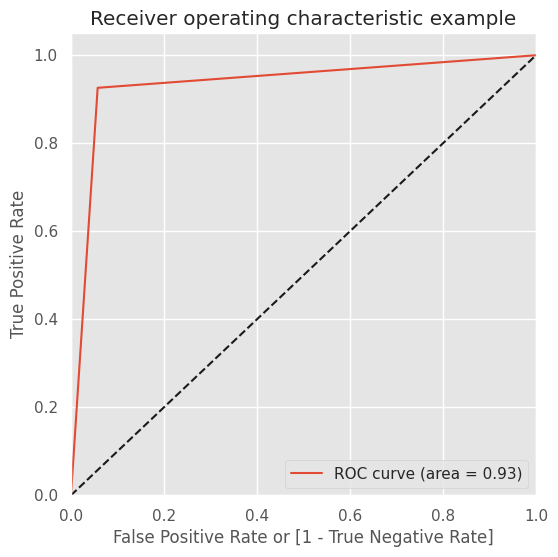

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94


In [ ]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
y_pred = model.predict(X_test)
accuracy, cnf_matrix = model_eval(model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("logistic regres - balance predict", y_train, X_train, y_test, X_test, model, 5)
draw_roc(model, X_test, y_test)
outcome = outcome.append(temp)
outcome

### Decision tree classifier with unbalanced data

In [ ]:
# decision tree doesn't require feature scaling, will use the raw features directly 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.03,0.04,0.18,0.20,0.19,0.20,0.17,0.14,0.19,1,0,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.28,0.21,1,0,17654,300,250,1994,2,39,33,1,28,3


0.9478666666666666
[[24077   829]
 [  735  4359]]


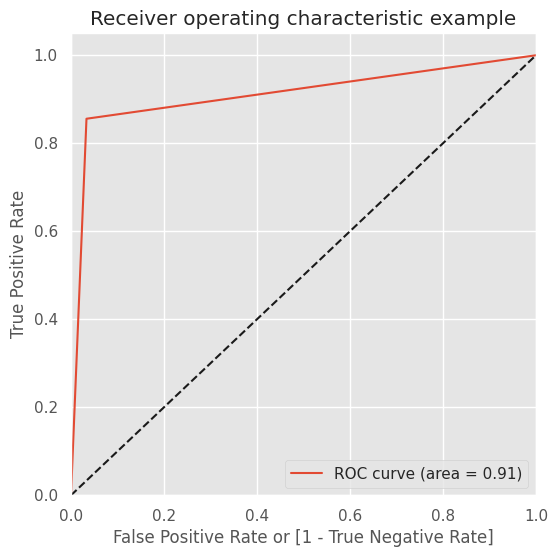

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95


In [ ]:
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - imbalance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome

### Decision tree classifier with balanced data

In [ ]:
# x_new and y_new are already calculated before for balanced dataset using the same.

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,1005,1,0.12,0.13,0.18,0.20,0.19,0.20,0.17,0.28,0.09,1,0,19771,320,50,2227,0,687,48,1,21,11
12154,1005,0,0.12,0.13,0.13,0.06,0.06,0.11,0.15,0.15,0.19,1,0,23804,320,50,2726,3,803,229,3,30,4


0.9787802136031478
[[23925   981]
 [   76 24830]]


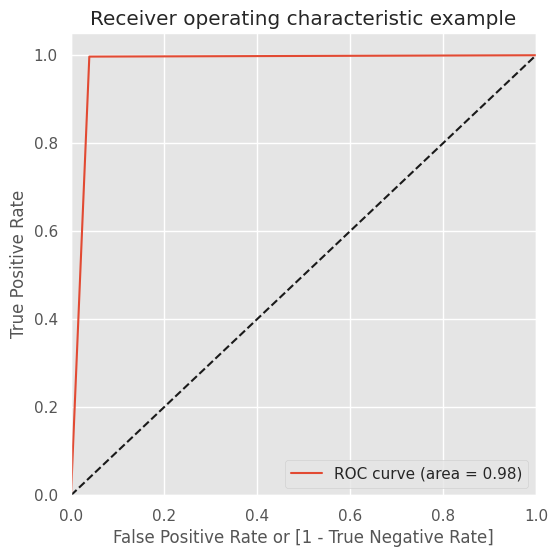

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
0,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97


In [ ]:
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_preds = dt_basic.predict(X_test)
accuracy, cnf_matrix = model_eval(dt_basic, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("decision tree basic - balance predict", y_train, X_train, y_test, X_test, dt_basic, 5)
draw_roc(dt_basic, X_test, y_test)
outcome = outcome.append(temp)
outcome

#### observation
* decision tree on unbalanced data isn't doing that great.
* decision tree on balanced data is really doing very good.
* decision tree on balanced data on test data as well as cross validation is doing really well.
* ROC_AUC curve looks really good.

### Random forest classifier with imbalanced data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
53023,1005,1,0.03,0.04,0.18,0.20,0.19,0.20,0.17,0.14,0.19,1,0,18856,320,50,1882,3,35,13,6,26,5
16863,1005,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.28,0.21,1,0,17654,300,250,1994,2,39,33,1,28,3


0.9581333333333333
[[24531   375]
 [  881  4213]]


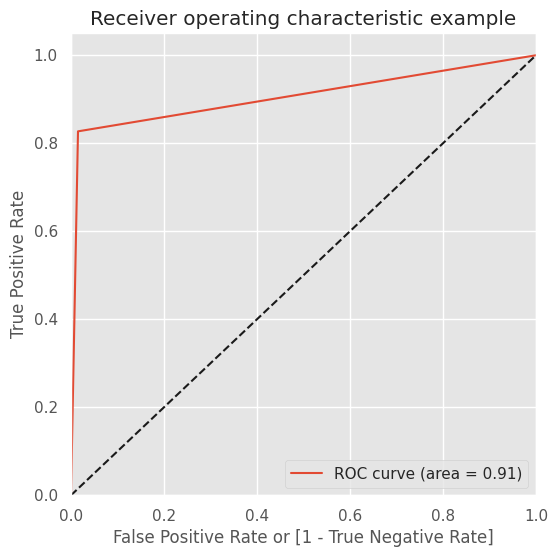

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
0,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,Random forest basic - imbalance predict,0.96,0.92,0.83,0.96,0.92,0.83,0.96,0.96,0.96,0.96,0.96,0.96


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - imbalance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

### Random forest classifier with balanced data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,1005,1,0.12,0.13,0.18,0.20,0.19,0.20,0.17,0.28,0.09,1,0,19771,320,50,2227,0,687,48,1,21,11
12154,1005,0,0.12,0.13,0.13,0.06,0.06,0.11,0.15,0.15,0.19,1,0,23804,320,50,2726,3,803,229,3,30,4


0.979041194892797
[[23908   998]
 [   46 24860]]


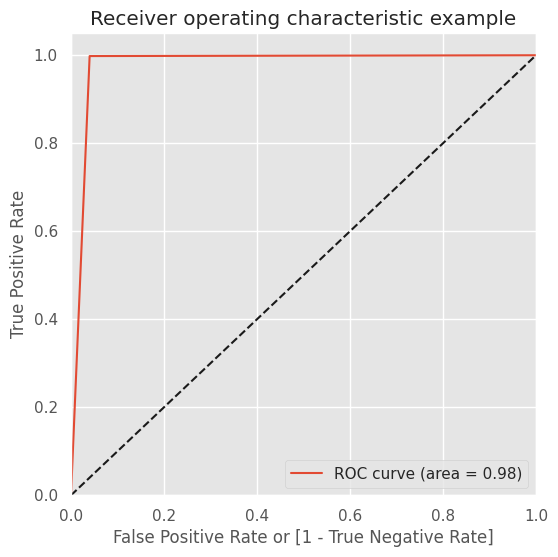

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
0,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,Random forest basic - imbalance predict,0.96,0.92,0.83,0.96,0.92,0.83,0.96,0.96,0.96,0.96,0.96,0.96
0,Random forest basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_preds = model_rf.predict(X_test)
accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print(accuracy)
print(cnf_matrix)
temp = store_results("Random forest basic - balance predict", y_train, X_train, y_test, X_test, model_rf, 5)
draw_roc(model_rf, X_test, y_test)
outcome = outcome.append(temp)
outcome

#### observarion :
* Random forest and Decision tree with balanced data set is performing the best so far on both train and test data.
* Random forest and Decision tree with balanced data holding good for cross validation as well. 
* Conclusion based on simple models built :- Random forest and Decision tree on balanced data set is the best model built

## Building basic models [with feature engineering]
in this will follow on building same models as before.

* Logistic regression.
* Decision tree classifier.
* Random forest Classifier. One Important observation : While building, we observed that building with balanced predictor is a better apporach. hence all the 3 models in feature engineering case will be built using balanced data set only.

In [ ]:
df_copy = df.copy()

Text(0.5, 1.05, 'Pearson correlation of Features')

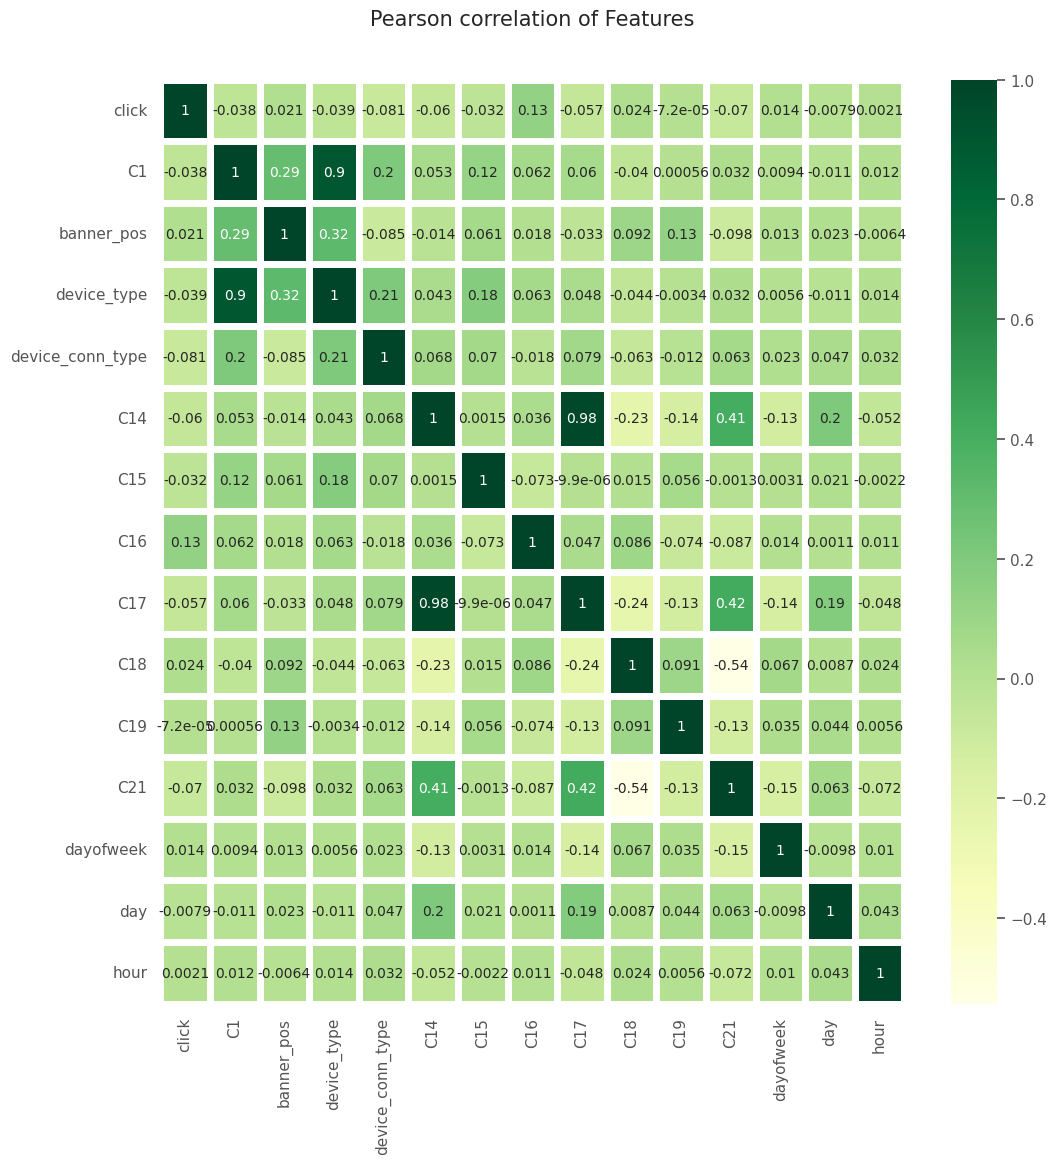

In [ ]:
corr = df_copy.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax, annot=True, linewidths=5,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

In [ ]:
# C1 and device_type are highly corelated, since C1 is anomalised column we can drop it.
# C14 and C17 are highly co-related, dropping either is a good idea.

df_copy.drop(['C14', 'C1'], axis=1, inplace= True)

In [ ]:
X = df_copy.drop(['click'], axis=1)
y = df_copy['click']

In [ ]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
0,1,0.03,0.03,0.18,0.20,0.19,0.20,0.17,0.15,0.19,1,0,320,50,2528,0,39,221,1,28,14
1,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.19,0.28,1,0,320,50,1934,2,39,16,2,22,19


0   0.83
1   0.17
Name: click, dtype: float64




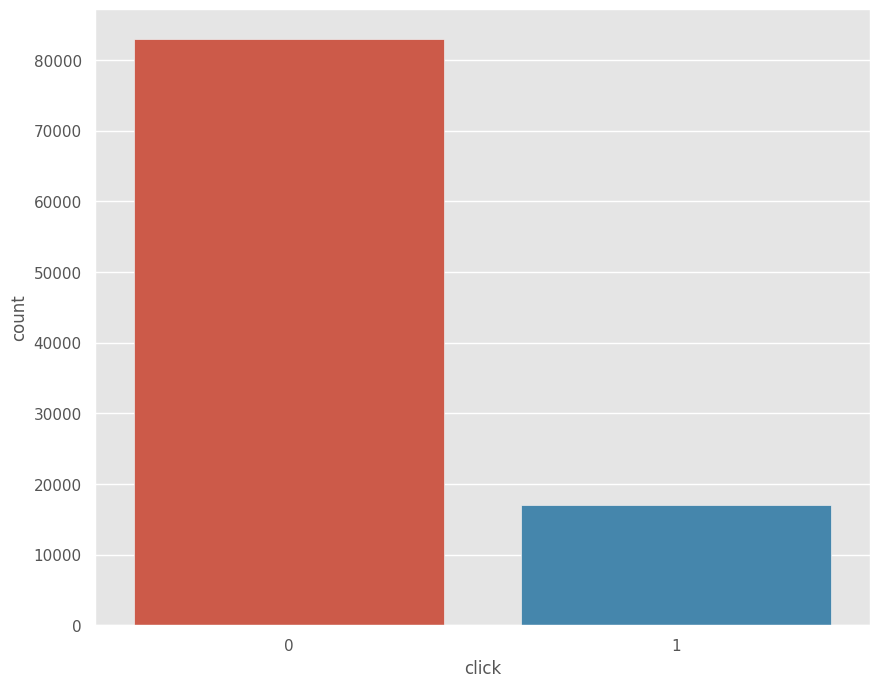

In [ ]:
# y is the target variable, analysing the same.
print(df_copy.click.value_counts(normalize=True))
print("\n")
plt.figure()
sns.countplot(x='click', data=df)
plt.show()

Original dataset shape  Counter({0: 83019, 1: 16980})
Resampled dataset shape Counter({0: 83019, 1: 83019})


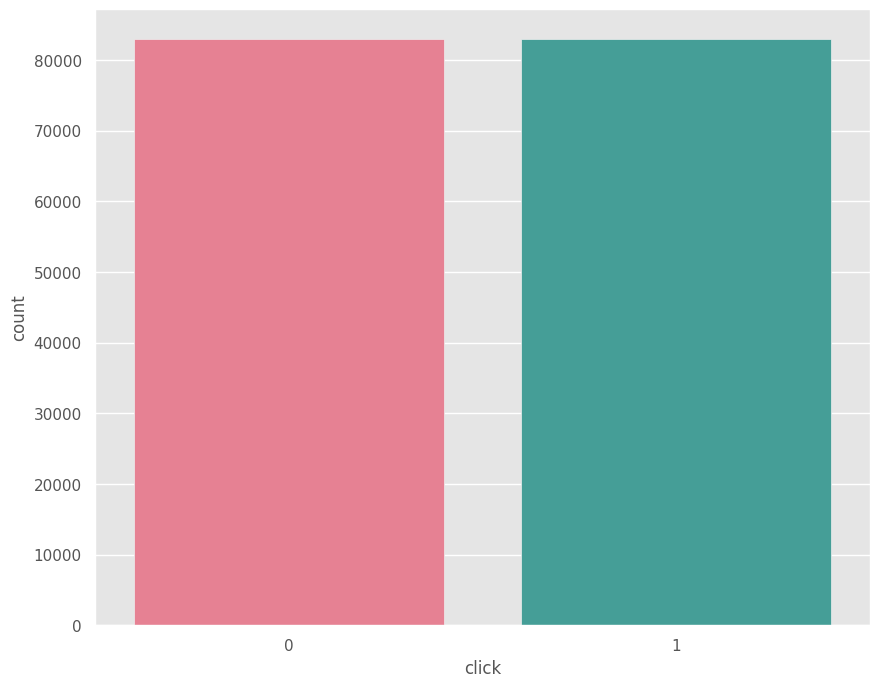

In [ ]:
# We will use balanced data for all the 
# x_new and y_new we will use for balanced data set for all modules
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new, palette='husl')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

### Logistic regression model with feature engineering and balance precidtor

In [ ]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,0.00,0.62,0.72,0.48,0.34,0.36,0.71,0.14,0.67,0.45,0.20,0.00,0.20,0.23,0.78,0.67,0.00,0.13,0.67,0.33,0.78
12154,0.00,0.16,0.20,0.21,0.11,0.09,0.30,0.10,0.34,0.30,0.20,0.00,0.22,0.03,0.99,1.00,0.43,0.90,0.50,1.00,0.17
16971,0.00,0.16,0.20,0.21,0.15,0.25,0.26,0.14,0.34,0.44,0.20,0.40,0.22,0.03,0.97,0.00,0.00,0.87,0.17,0.78,0.48
114504,0.00,0.27,0.32,0.34,0.34,0.36,0.71,0.14,0.67,0.33,0.20,0.00,0.22,0.03,0.83,0.67,0.72,0.20,0.00,0.67,0.52
24685,0.00,0.16,0.20,0.21,0.23,0.18,0.30,0.14,0.34,0.18,0.20,0.00,0.22,0.03,0.82,1.00,0.01,0.16,0.00,0.67,0.39


In [ ]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116204
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20502.
Date:                Sun, 14 May 2023   Deviance:                       41004.
Time:                        17:12:34   Pearson chi2:                 1.03e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6442
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.1290      0.262    -65.353      0.000     -17.643     -16.615
banner_pos           2.7256      0.230     11.856      0.000       2.275       3.176
site_id            -10.0168      0.266    -37.643      0.000     -10.538      -9.495
site_domain         12.7134      0.252     50.434      0.000      12.219      13.208
site_category        3.8257      0.209     18.269      0.000       3.415       4.236
app_id               4.9003      0.275     17.851      0.000       4.362       5.438
app_domain          -4.0534      0.277    -14.658      0.000      -4.595      -3.511
app_category        -0.8520      0.131     -6.483      0.000      -1.110      -0.594
device_id           31.3058      0.945     33.113      0.000      29.453      33.159
device_ip           21.1115      0.132    159.749      0.000      20.852      21.370
device_model         1.4313      0.145      9.862      0.000       1.147       1.716
device_type         -0.4123      0.290     -1.420      0.156      -0.981       0.157
device_conn_type     0.0839      0.119      0.703      0.482      -0.150       0.318
C15                  2.1204      0.775      2.735      0.006       0.601       3.640
C16                 -4.8084      0.360    -13.374      0.000      -5.513      -4.104
C17                  0.2401      0.076      3.145      0.002       0.090       0.390
C18                 -0.0046      0.040     -0.117      0.907      -0.082       0.073
C19                  0.5214      0.069      7.533      0.000       0.386       0.657
C21                 -0.1358      0.065     -2.088      0.037      -0.263      -0.008
dayofweek            0.1894      0.046      4.113      0.000       0.099       0.280
day                 -0.1373      0.042     -3.252      0.001      -0.220      -0.055
hour                -0.2291      0.052     -4.415      0.000      -0.331      -0.127
====================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[54696  3417]
 [ 4125 53988]]
0.9351091838315007


In [ ]:
def sm_model_evaluation (model, x_test, y_test):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [ ]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  

0.9347948285553682
[[23453  1453]
 [ 1795 23111]]


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,180.97
2,site_id,9.06
3,site_domain,8.97
5,app_id,2.51
6,app_domain,2.34
7,app_category,2.34
4,site_category,1.92
18,C21,1.76
14,C16,1.73
16,C18,1.61


In [ ]:
# VIF looks good, w.r.t P values hour and dayofweek have got highest, will remove and build the model.

X_train_sm.drop(['hour','day'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116206
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20518.
Date:                Sun, 14 May 2023   Deviance:                       41036.
Time:                        17:12:40   Pearson chi2:                 1.04e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6441
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.2655      0.262    -65.805      0.000     -17.780     -16.751
banner_pos           2.7541      0.230     11.988      0.000       2.304       3.204
site_id            -10.0360      0.266    -37.753      0.000     -10.557      -9.515
site_domain         12.7098      0.252     50.461      0.000      12.216      13.203
site_category        3.8418      0.210     18.335      0.000       3.431       4.252
app_id               4.8515      0.274     17.682      0.000       4.314       5.389
app_domain          -3.9360      0.276    -14.276      0.000      -4.476      -3.396
app_category        -0.8842      0.131     -6.736      0.000      -1.142      -0.627
device_id           31.3384      0.947     33.104      0.000      29.483      33.194
device_ip           21.0959      0.132    159.875      0.000      20.837      21.355
device_model         1.4384      0.145      9.916      0.000       1.154       1.723
device_type         -0.4439      0.290     -1.530      0.126      -1.012       0.125
device_conn_type     0.0810      0.119      0.679      0.497      -0.153       0.315
C15                  2.0539      0.784      2.620      0.009       0.517       3.590
C16                 -4.7918      0.359    -13.336      0.000      -5.496      -4.088
C17                  0.1990      0.075      2.656      0.008       0.052       0.346
C18                 -0.0109      0.040     -0.275      0.784      -0.089       0.067
C19                  0.5102      0.069      7.384      0.000       0.375       0.646
C21                 -0.1056      0.065     -1.632      0.103      -0.232       0.021
dayofweek            0.1914      0.046      4.157      0.000       0.101       0.282
====================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,175.79
2,site_id,9.06
3,site_domain,8.97
5,app_id,2.50
7,app_category,2.34
6,app_domain,2.33
4,site_category,1.92
18,C21,1.76
14,C16,1.73
16,C18,1.61


In [ ]:
X_train_sm.drop(['dayofweek','device_ip', 'C15'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116209
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59079.
Date:                Sun, 14 May 2023   Deviance:                   1.1816e+05
Time:                        17:12:44   Pearson chi2:                 9.46e+16
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3090
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.1374      0.176    -68.889      0.000     -12.483     -11.792
banner_pos           0.3090      0.122      2.539      0.011       0.070       0.548
site_id              2.5692      0.186     13.790      0.000       2.204       2.934
site_domain          2.6028      0.174     14.999      0.000       2.263       2.943
site_category        0.6063      0.120      5.046      0.000       0.371       0.842
app_id               6.9374      0.138     50.106      0.000       6.666       7.209
app_domain          -2.5658      0.139    -18.480      0.000      -2.838      -2.294
app_category        -1.3629      0.065    -21.032      0.000      -1.490      -1.236
device_id           65.4159      1.206     54.245      0.000      63.052      67.779
device_model         3.3226      0.079     41.807      0.000       3.167       3.478
device_type          1.2403      0.182      6.823      0.000       0.884       1.597
device_conn_type     0.0801      0.061      1.309      0.190      -0.040       0.200
C16                 -3.1514      0.198    -15.905      0.000      -3.540      -2.763
C17                 -0.0767      0.036     -2.117      0.034      -0.148      -0.006
C18                 -0.1919      0.021     -9.330      0.000      -0.232      -0.152
C19                  0.1002      0.037      2.690      0.007       0.027       0.173
C21                 -0.2327      0.034     -6.914      0.000      -0.299      -0.167
====================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.67
2,site_id,9.05
3,site_domain,8.88
5,app_id,2.41
7,app_category,2.32
6,app_domain,2.31
4,site_category,1.91
16,C21,1.74
12,C16,1.73
14,C18,1.61


### Model P values and VIF looks good, will find the best threshold for classification

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[41194 16919]
 [13794 44319]]
0.7357475952024504


In [ ]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.7373122942262909
[[17775  7131]
 [ 5954 18952]]


In [ ]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
138890,1,0.88,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
12154,0,0.03,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16971,0,0.37,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
114504,1,0.56,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
24685,0,0.30,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.50,0.50,1.00
0.05,0.05,0.55,0.53,1.00
0.10,0.10,0.59,0.55,1.00
0.15,0.15,0.63,0.58,0.99
0.20,0.20,0.66,0.60,0.98
0.25,0.25,0.68,0.62,0.96
0.30,0.30,0.70,0.64,0.94
0.35,0.35,0.72,0.66,0.90
0.40,0.40,0.73,0.68,0.87
0.45,0.45,0.73,0.70,0.83


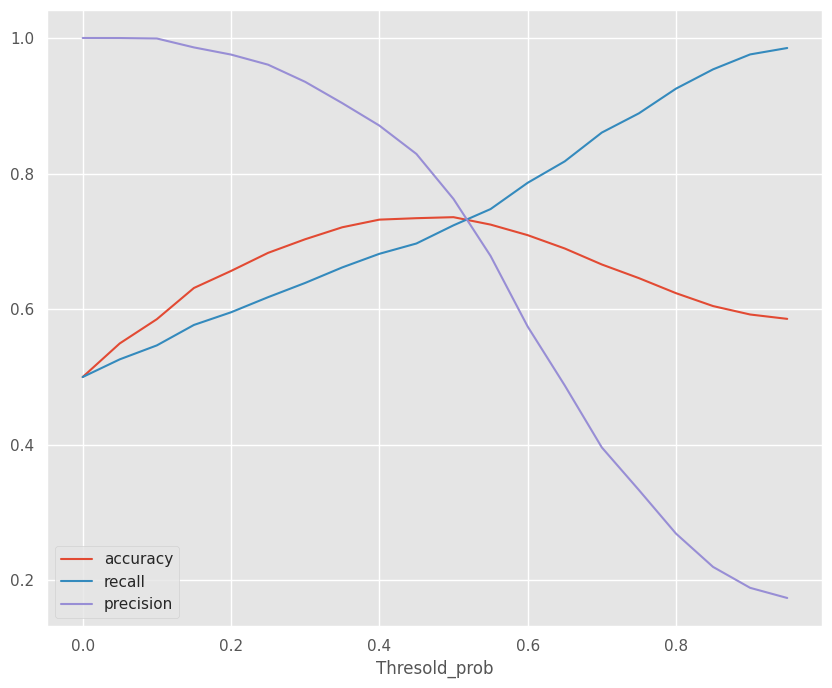

In [ ]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
138890,1,0.88,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
12154,0,0.03,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16971,0,0.37,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
114504,1,0.56,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
24685,0,0.30,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(116226, 16)
(49812, 16)


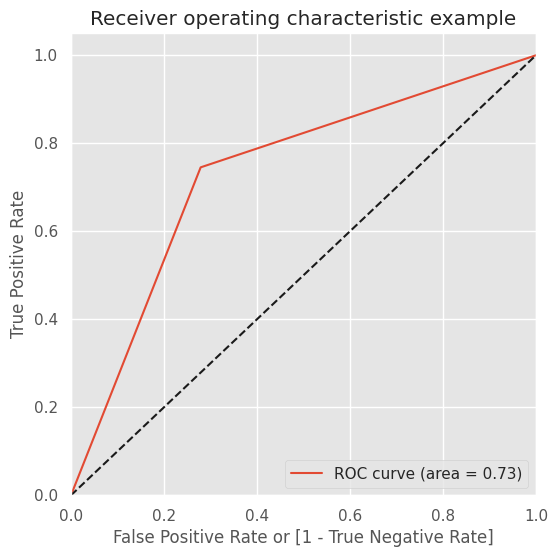

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
0,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,Random forest basic - imbalance predict,0.96,0.92,0.83,0.96,0.92,0.83,0.96,0.96,0.96,0.96,0.96,0.96
0,Random forest basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,logistic reg with feature engine,0.73,0.73,0.75,0.73,0.73,0.75,0.73,0.73,0.73,0.73,0.73,0.73


In [ ]:
model = LogisticRegression()
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_eval(model, X_test[X_train_sm.columns], y_test)
temp = store_results("logistic reg with feature engine", y_train, X_train_sm, y_test, X_test[X_train_sm.columns], \
                     model, 5)
draw_roc(model, X_test[X_train_sm.columns], y_test)
outcome = outcome.append(temp)
outcome

### Decision tree model with feature engineering and balance precidtor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.28,0.28,1,0,300,250,2162,2,39,33,4,24,18
12154,0,0.12,0.13,0.13,0.06,0.06,0.11,0.15,0.15,0.19,1,0,320,50,2726,3,803,229,3,30,4


In [ ]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.85
20,hour,0.03
9,device_model,0.03
7,device_id,0.02
18,dayofweek,0.01
14,C17,0.01
2,site_domain,0.01
19,day,0.01
1,site_id,0.01
16,C19,0.00


In [ ]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

In [ ]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

['device_id', 'device_ip', 'device_model', 'hour']
4
Train results
accuracy 0.9919123087777262
cnf_matrix 
 [[57369   744]
 [  196 57917]]
Test results
accuracy 0.9720750020075484
cnf_matrix 
 [[23779  1127]
 [  264 24642]]


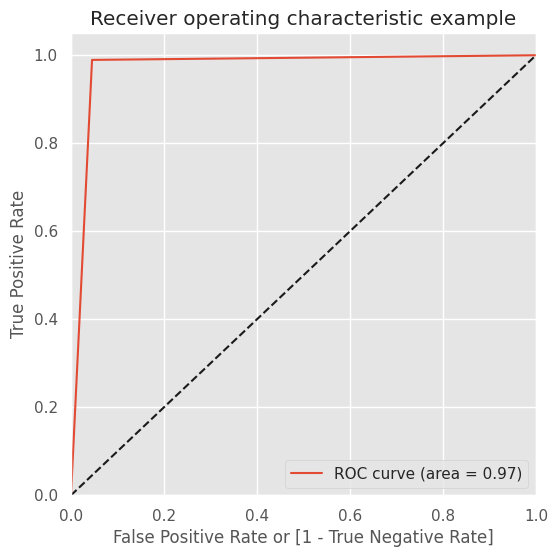

(array([0.        , 0.04525014, 1.        ]),
 array([0.        , 0.98940014, 1.        ]),
 array([2, 1, 0]))

In [ ]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dt_tree.predict(X_train)
predict_rf_test = dt_tree.predict(X_test)

accuracy, cnf_matrix = model_eval(dt_tree, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

draw_roc(dt_tree, X_test, y_test)

Above basic tree with right features seems data is overfitting. having the correct hyper parameter tuning help in interpretation and bit of over fitting of the model.

In [ ]:
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dtree = DecisionTreeClassifier(random_state= 42)
tree3 = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
tree3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [ ]:
tree3.best_params_

{'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [ ]:
tree3.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

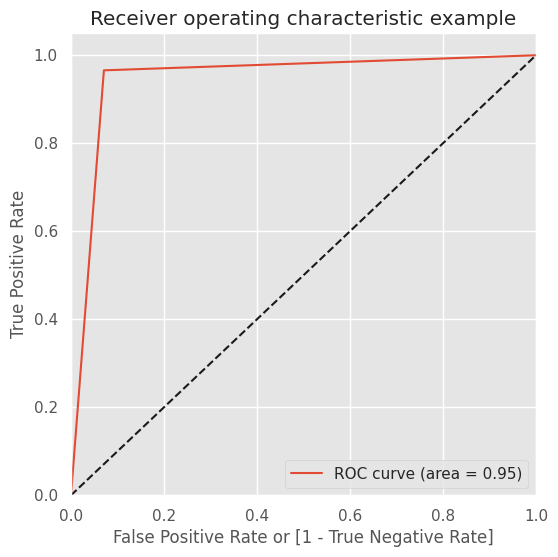

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
0,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
0,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
0,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
0,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,Random forest basic - imbalance predict,0.96,0.92,0.83,0.96,0.92,0.83,0.96,0.96,0.96,0.96,0.96,0.96
0,Random forest basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
0,logistic reg with feature engine,0.73,0.73,0.75,0.73,0.73,0.75,0.73,0.73,0.73,0.73,0.73,0.73
0,Decision tree with feature engine,0.95,0.93,0.97,0.95,0.93,0.97,0.95,0.94,0.95,0.95,0.95,0.95


In [ ]:
dt_tree =  DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)
dt_tree.fit(X_train, y_train)
accuracy, cnf_matrix = model_eval(dt_tree, X_test, y_test)
temp = store_results("Decision tree with feature engine", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
draw_roc(dt_tree, X_test, y_test)
outcome = outcome.append(temp)
outcome

### Random forest model with feature engineering and balance precidtor.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,dayofweek,day,hour
138890,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.28,0.28,1,0,300,250,2162,2,39,33,4,24,18
12154,0,0.12,0.13,0.13,0.06,0.06,0.11,0.15,0.15,0.19,1,0,320,50,2726,3,803,229,3,30,4


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
8,device_ip,0.71
7,device_id,0.07
9,device_model,0.05
20,hour,0.03
1,site_id,0.03
2,site_domain,0.03
4,app_id,0.02
19,day,0.01
18,dayofweek,0.01
14,C17,0.01


using random forest feature importance metric to decide on best features and building the model.

['site_id', 'site_domain', 'device_id', 'device_ip', 'device_model', 'hour']
6
Train results
accuracy 0.9963261232426479
cnf_matrix 
 [[57738   375]
 [   52 58061]]
Test results
accuracy 0.9761101742551995
cnf_matrix 
 [[23861  1045]
 [  145 24761]]


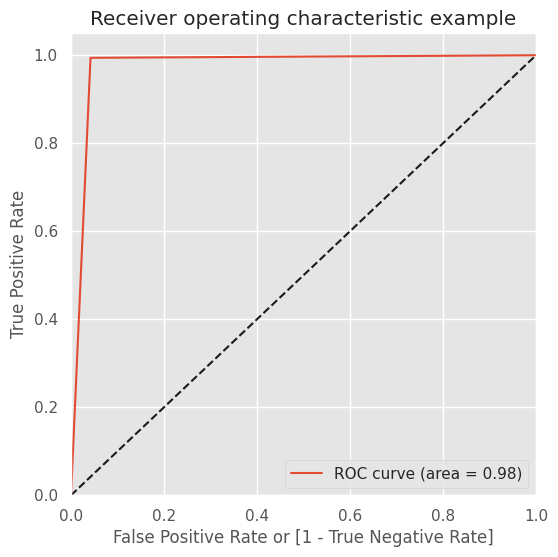

(array([0.        , 0.04195776, 1.        ]),
 array([0.        , 0.99417811, 1.        ]),
 array([2, 1, 0]))

In [ ]:
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)
        
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print(rf_cols)

print(len(rf_cols))
predict_rf = model_rf.predict(X_train)
predict_rf_test = model_rf.predict(X_test)

accuracy, cnf_matrix = model_eval(model_rf, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_eval(model_rf, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

draw_roc(model_rf, X_test, y_test)

In [ ]:
temp = store_results("Random Forest with feature engine", y_train, X_train, y_test, X_test, \
                     model_rf, 5)
outcome = outcome.append(temp)

In [ ]:
outcome.reset_index(drop=True, inplace=True)
outcome

,Model,Accuracy_train,recall_train,precision_train,Accuracy_test,recall_test,precision_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy classifier,0.83,NaN,0.00,0.83,NaN,0.00,0.83,0.83,0.83,0.83,0.83,0.83
1,logistic regres - imbalance predict,0.95,0.89,0.82,0.95,0.89,0.82,0.95,0.95,0.95,0.95,0.95,0.95
2,logistic regres - balance predict,0.93,0.94,0.93,0.93,0.94,0.93,0.93,0.93,0.94,0.93,0.93,0.94
3,decision tree basic - imbalance predict,0.95,0.84,0.86,0.95,0.84,0.86,0.95,0.95,0.95,0.95,0.95,0.95
4,decision tree basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
5,Random forest basic - imbalance predict,0.96,0.92,0.83,0.96,0.92,0.83,0.96,0.96,0.96,0.96,0.96,0.96
6,Random forest basic - balance predict,0.98,0.96,1.00,0.98,0.96,1.00,0.97,0.97,0.98,0.97,0.97,0.97
7,logistic reg with feature engine,0.73,0.73,0.75,0.73,0.73,0.75,0.73,0.73,0.73,0.73,0.73,0.73
8,Decision tree with feature engine,0.95,0.93,0.97,0.95,0.93,0.97,0.95,0.94,0.95,0.95,0.95,0.95
9,Random Forest with feature engine,0.98,0.96,0.99,0.98,0.96,0.99,0.97,0.97,0.97,0.97,0.97,0.97


### conclusion
If we have to select one model, Random forest classifier with feature enginnering looks promising and best. although after the feature engineering the training and test results looks same as before feature engineering, but model is very robust with new features and rightly fitted for both training and test dataset. Decisiontree and logistic regression classifer seems to have next best model to choose as the accuracy, precision, and recall is good, overall random forest classifier seems doing better with all aspects

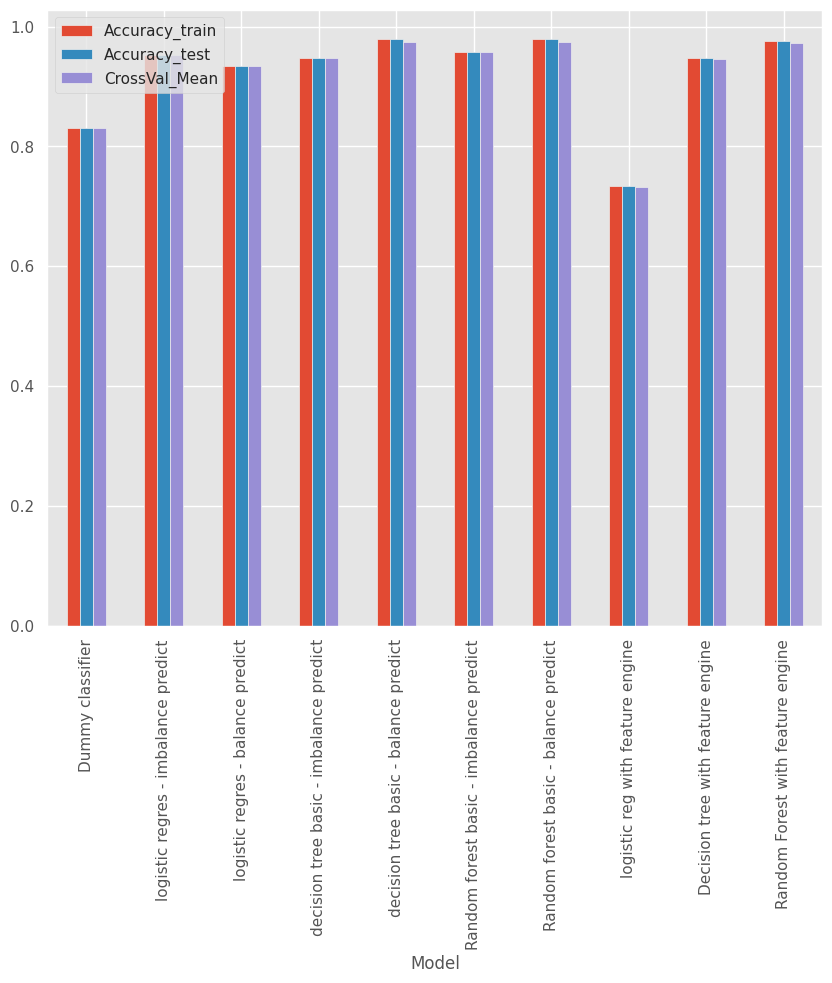

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
outcome.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()

### Which 3 methods of classification are chosen and why?
* Logistic Regression:
  - Easy to interpret the model and understand the relationship between the independent and dependent variables
  - Can handle both categorical and continuous variables
  - Can be used for binary as well as multi-class classification problems
  - Computationally efficient and can handle large datasets with ease
* Decision Tree:
  - Can handle both categorical and continuous variables
  - Easy to interpret and visualize the tree structure
  - Can handle non-linear relationships between variables
  - Can handle interactions between variables
* Random Forest:
  - Can handle both categorical and continuous variables
  - Can handle non-linear relationships between variables
  - Can handle interactions between variables
  - Reduces the risk of overfitting by using multiple trees and aggregating the results
  - Provides feature importance measures to identify the most important variables for classification
### Which method among the 3 chosen is working better than the other 2
* Random forest is an ensembled model that works in Boostrap Aggregration model which will tries to reduce to variance between train and test, even though Decision tree giving nearly fair result compared to Randomforest, Random forest will be a robust model and will try to avoid data drift during deployemnt stage

### How is feature engineering changing the results of the evaluation metrics
* Feature engineering of Upsampling, VIF, Feature selection helps increase the performance of the model, This helps brining higher Accuracy, Precision and Recall. In Summary, In summary, feature engineering has a significant impact on the evaluation metrics of machine learning models by providing more relevant and informative features that can improve the accuracy, precision, recall of the model.